In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# DATA SET1: Stanford Open Policing Project
ri = pd.read_csv('police.csv')

In [4]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
ri.shape

(91741, 15)

In [6]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [7]:
ri.isnull().sum()  # The count of missing value in a given column

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [8]:
## Remove the column(s) that only contains missing values
ri.drop('county_name', axis='columns', inplace=True)

In [9]:
ri.shape

(91741, 14)

In [10]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [11]:
## Other method which can be used for the above task

ri.dropna(how='all', axis='columns').shape

(91741, 14)

In [12]:
## Do men or women speed more often?

ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [13]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [14]:
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [15]:
## Result At Line 23 and Line 24 can be found out using one line code as:

ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [16]:
## If we want to filter the gender further on the `Speeding` index

ri.groupby('driver_gender').violation.value_counts(normalize=True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

In [17]:
ri.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [18]:
## Does gender affect who gets searched during a stop?
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [19]:
ri.search_conducted.mean()   # It gives the same result as line 30

0.03483720473942948

In [20]:
ri[ri.driver_gender == 'M'].search_conducted.value_counts(normalize=True)

False    0.956674
True     0.043326
Name: search_conducted, dtype: float64

In [21]:
ri[ri.driver_gender == 'F'].search_conducted.value_counts(normalize=True)

False    0.979967
True     0.020033
Name: search_conducted, dtype: float64

In [22]:
# Nifty way to find collaborative answer for line 32 and line 33

ri.groupby('driver_gender').search_conducted.mean()   # get percentage of time it is a `1`

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [23]:
## 4. Why is search_type missing so often?
ri.search_conducted.value_counts()


False    88545
True      3196
Name: search_conducted, dtype: int64

In [24]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [25]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Inventory,

In [27]:
## 5. During the search how often the driver frisked?
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [29]:
ri['frisk'].value_counts(dropna=False)  ## str.contains() preserves the NaN count

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [32]:
ri['frisk'].sum()

274

In [33]:
ri['frisk'].mean()  # 85.73% times when there is a search there is a `Frisk`

0.08573216520650813

In [44]:
## 6. Which year has least number of stops?
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [50]:
# To combine two columns that are strings
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")

In [51]:
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [52]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [53]:
ri.stop_datetime

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [54]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [58]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [60]:
## How does drug activity change by time of day?
ri.drugs_related_stop.mean()

0.008883705213590434

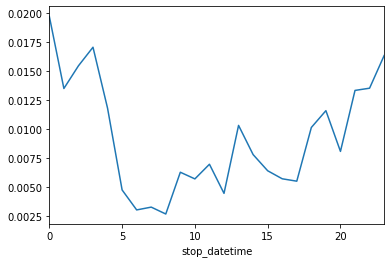

In [63]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

In [68]:
## 9. Do most stops occur at night?
ri.stop_datetime.dt.hour.value_counts().sort_values()

5      210
4      254
3     1172
21    1499
18    2168
19    2587
17    2900
2     2975
6     3290
20    3340
22    3473
12    3582
16    3844
1     4442
7     4572
15    4832
13    4842
8     5210
0     5221
23    5629
14    5634
11    5877
9     6838
10    7350
Name: stop_datetime, dtype: int64

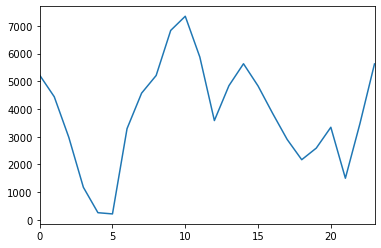

In [70]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

In [71]:
# If we suppose night hours from 8 pm to 4 am
ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 20)].shape

(63736, 16)

In [72]:
ri.shape

(91741, 16)

In [79]:
## 10. Find the bad data in the `stop_duration` column and fix it.
ri['stop_duration'].value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [83]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [85]:
# use loc() to resolve it
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'


In [87]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [91]:
import numpy as np

In [92]:
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan  # you can use replace() instead of np.nan

In [93]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64